# Adult Income Factors



In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import io
import requests

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

response = requests.get(url, verify=False)
data = response.content.decode('utf-8')

x = pd.read_csv(io.StringIO(data), names=columns, skipinitialspace=True)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


## Observation and Cleaning of Dataset

In [ ]:
x.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#What types of working classes are there
x['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [ ]:
#Martial Status
x['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


In [ ]:
# What countries?
x['native-country'].value_counts()

,count
native-country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [ ]:
#What races are examined?

x['race'].value_counts()

,count
race,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


### Question 1

In [ ]:
#Relist the items
x.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


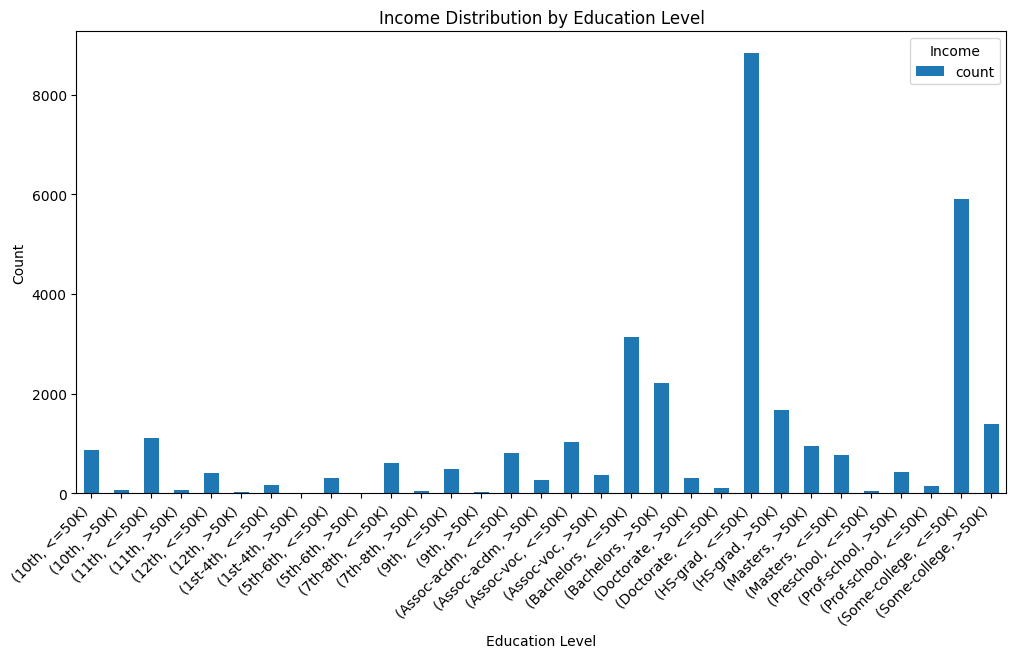

In [ ]:
w = x.groupby('education')['income'].value_counts()
# Plotting
w.plot(kind='bar', stacked=True, figsize=(12, 6))
# Add labels and title
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income')


# Show the plot
plt.show()

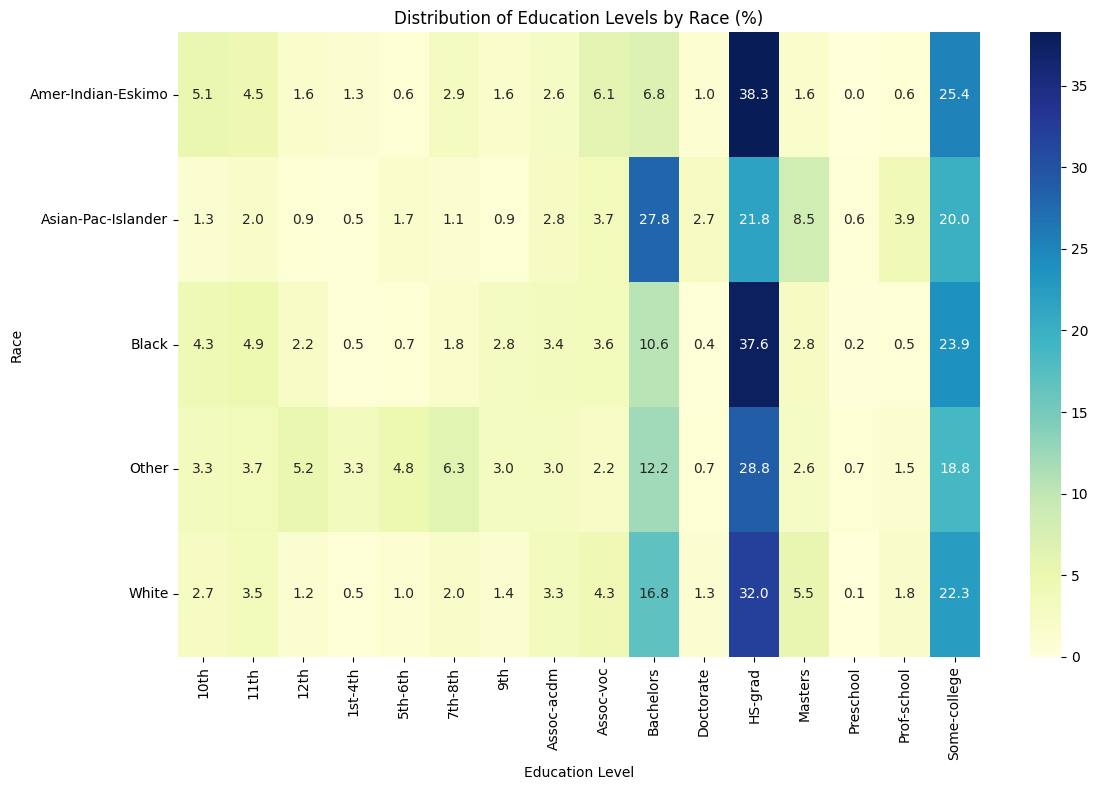

In [ ]:
# Make a cross tab
cross_tab = pd.crosstab(x['race'], x['education'])

cross_tab_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
#Plot out a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab_pct, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Distribution of Education Levels by Race (%)')
plt.ylabel('Race')
plt.xlabel('Education Level')
plt.tight_layout()
plt.show()


### Question 2

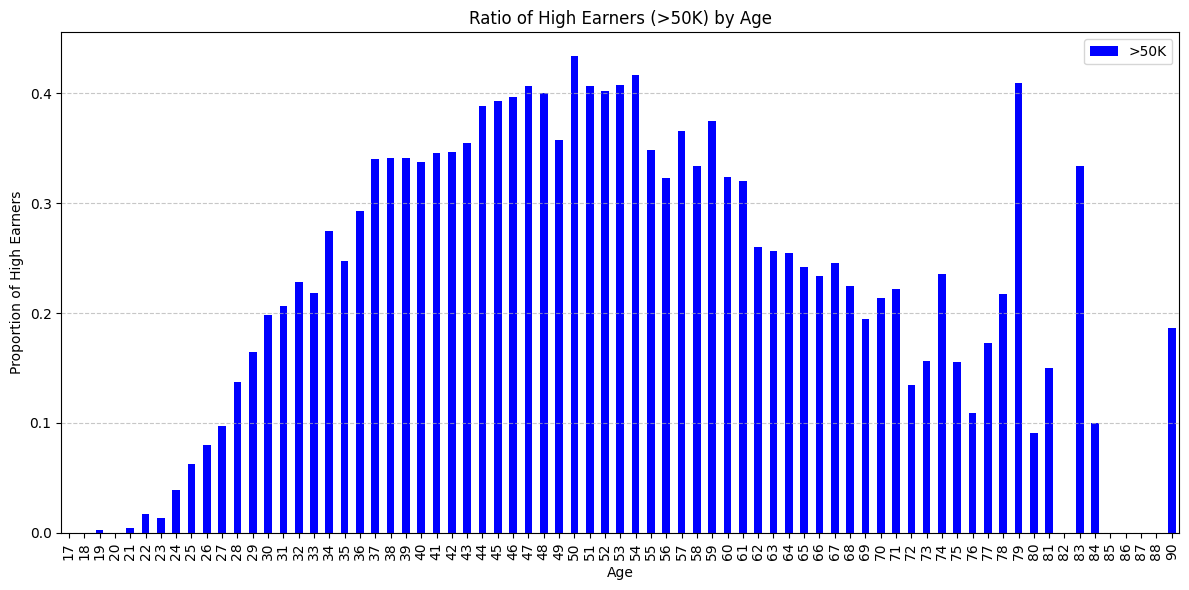

In [ ]:
x.groupby('age')['income'].value_counts()

income_proportions = x.groupby('age')['income'].value_counts(normalize=True).unstack()
high_income_proportion = income_proportions['>50K'].fillna(0)

# Histogram
plt.figure(figsize=(12, 6))
high_income_proportion.plot(kind='bar', color='blue')

plt.title('Ratio of High Earners (>50K) by Age')
plt.xlabel('Age')
plt.ylabel('Proportion of High Earners')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-39-a18f9495551a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x, x='age', y='occupation', inner='box', palette='Dark2')


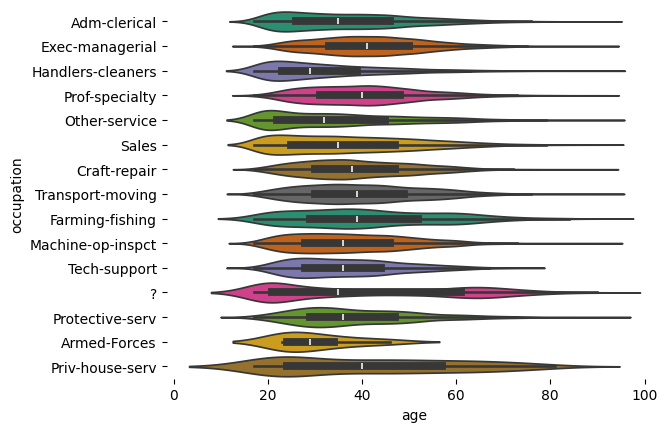

In [ ]:
#Plot a violinplot to spot out occupations with a higher median age
sns.violinplot(x, x='age', y='occupation', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Question 3

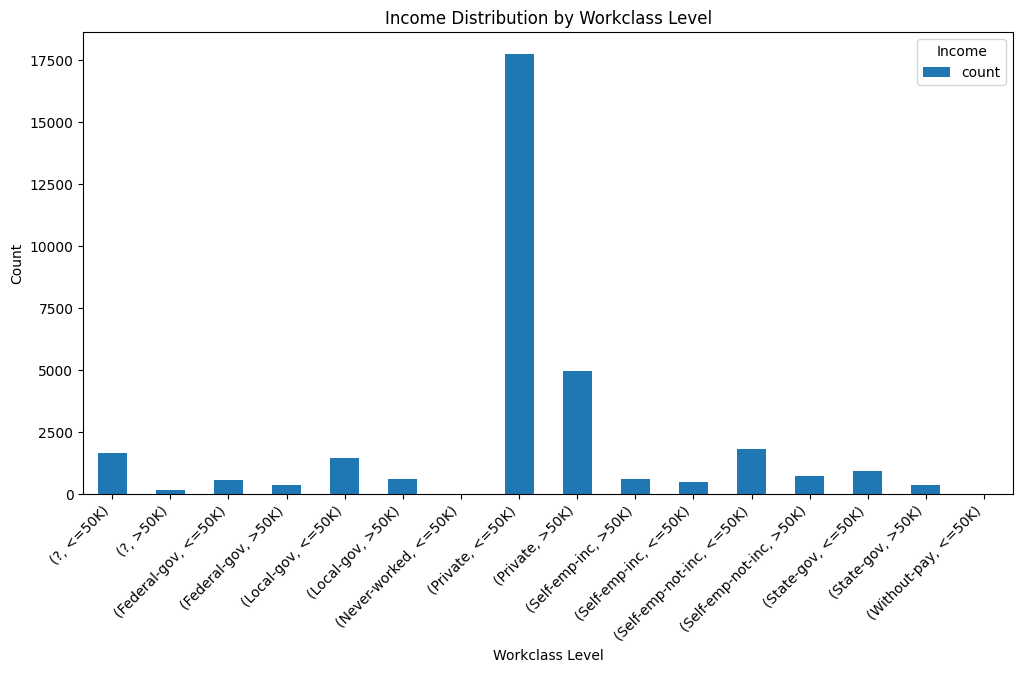

In [ ]:
p = x.groupby('workclass')['income'].value_counts()

# Plot a stacked bar chart
p.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add labels and title
plt.title('Income Distribution by Workclass Level')
plt.xlabel('Workclass Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income')


# Show the plot
plt.show()

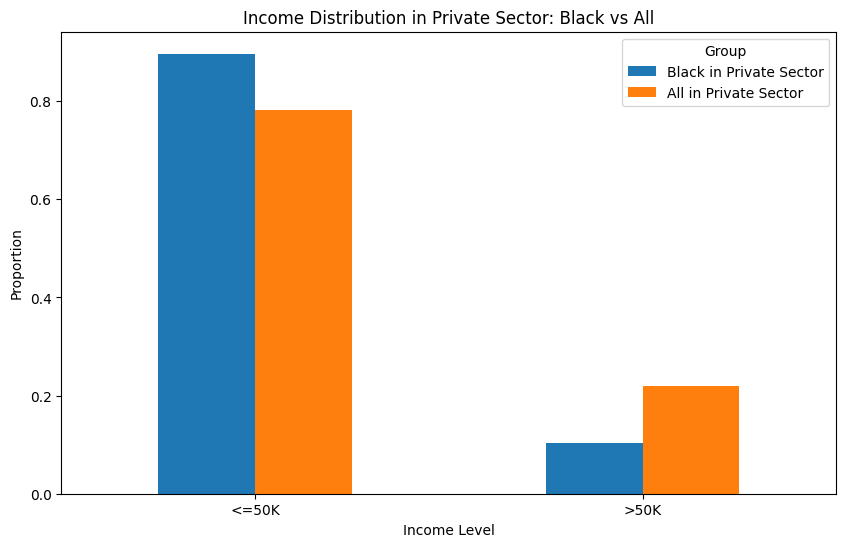

Proportions of income levels:
        Black in Private Sector  All in Private Sector
income                                                
<=50K                  0.896599               0.781327
>50K                   0.103401               0.218673


In [ ]:


private_black = x[(x['workclass'].str.contains('Private', case=False)) & (x['race'] == 'Black')]

# Calculate the proportion of high earners (>50K) for Black individuals in private sector
black_private_income = private_black['income'].value_counts(normalize=True)

# Compare with overall private sector proportions
private_all = x[x['workclass'].str.contains('Private', case=False)]
all_private_income = private_all['income'].value_counts(normalize=True)

# Create a DataFrame for comparison
comparison = pd.DataFrame({
    'Black in Private Sector': black_private_income,
    'All in Private Sector': all_private_income
})

# Plot a bar chart
comparison.plot(kind='bar', figsize=(10, 6))

plt.title('Income Distribution in Private Sector: Black vs All')
plt.xlabel('Income Level')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Group')
plt.show()

# Print the exact proportions
print("Proportions of income levels:")
print(comparison)

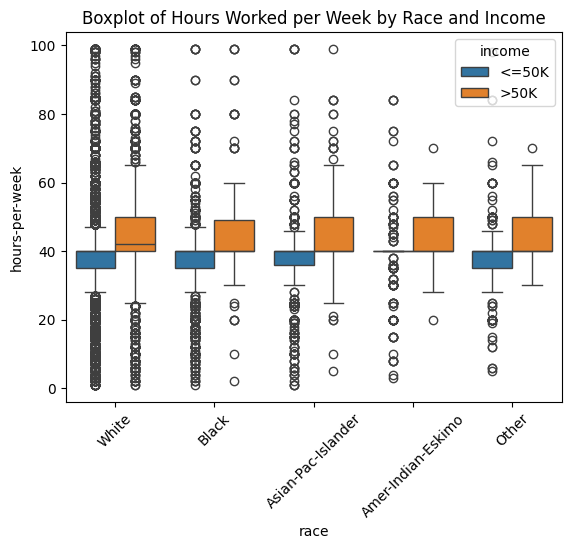

In [ ]:
sns.boxplot(x='race', y='hours-per-week', hue='income', data=x)
plt.xticks(rotation=45)
plt.title('Boxplot of Hours Worked per Week by Race and Income')
plt.show()

## Question 4

sex
Female    0.109461
Male      0.305737
Name: >50K, dtype: float64


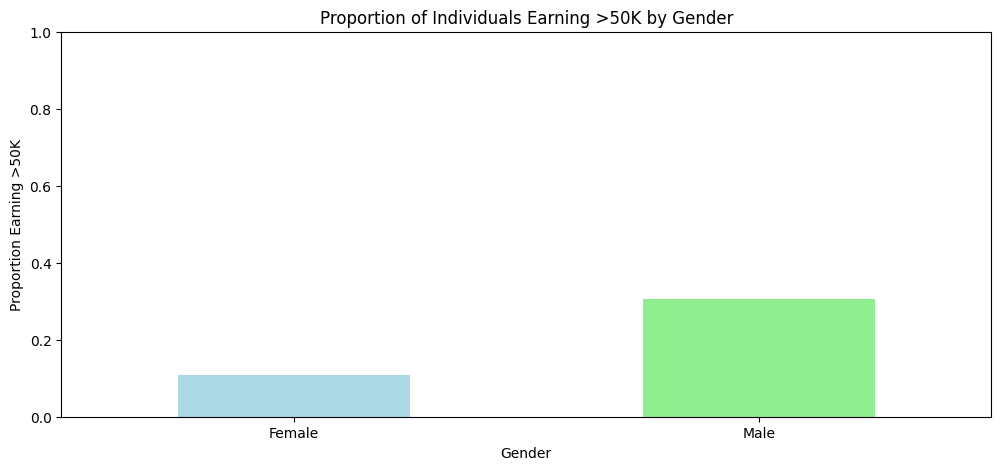

In [ ]:

# Calculate the count of each income category by gender
income_counts_by_gender = x.groupby('sex')['income'].value_counts(normalize=True).unstack()

# Select the proportion of '>50K'
proportion_high_income_by_gender = income_counts_by_gender['>50K']

# Print the proportions
print(proportion_high_income_by_gender)

# Plot a bar chart
plt.figure(figsize=(12, 5))
proportion_high_income_by_gender.plot(kind='bar', color=['lightblue', 'lightgreen'])

plt.title('Proportion of Individuals Earning >50K by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion Earning >50K')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

In [ ]:
#percentage of males over 50k that are married

# Filter for males earning >50K
males_over_50k = x[(x['sex'] == 'Male') & (x['income'] == '>50K')]

# Calculate the percentage who are married
total_males_over_50k = len(males_over_50k)
married_males_over_50k = males_over_50k['marital-status'].value_counts().get('Married-civ-spouse', 0)

percentage_married = (married_males_over_50k / total_males_over_50k) * 100

print(f"Percentage of married males earning >$50K: {percentage_married:.1f}%")


Percentage of married males earning >$50K: 89.1%


# Modeling

## Baseline Modeling

In [ ]:
from sklearn.metrics import accuracy_score

#set up baseline model
y = x['income']
baseline_preds  = [y.mode()[0]] * len(y)
# Calculate accuracy
baseline_accuracy = accuracy_score(y, baseline_preds)
print('Baseline Accuracy:', baseline_accuracy)

Baseline Accuracy: 0.7591904425539756


In [ ]:
#Import items from sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


## Confusion Matrix Based Off KNN and Least regression





In [ ]:
x.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [ ]:
#Import more
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

#Split into train and test
X = x.drop(columns=['income'])
le = LabelEncoder()
y = le.fit_transform(x['income'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)


#seperate into cat and num cols
cat_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

encoder = make_column_transformer(
    (OneHotEncoder(drop='first'), caT_cols),
    (StandardScaler(), numerical_cols),
    remainder='passthrough'
)

# Pipelines
knn_pipe = Pipeline([('transform', encoder), ('model', KNeighborsClassifier())])
lgr_pipe = Pipeline([('transform', encoder), ('model', LogisticRegression())])


# Fit models
knn_pipe.fit(X_train, y_train)
lgr_pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object'))])),
                ('model', LogisticRegression())])

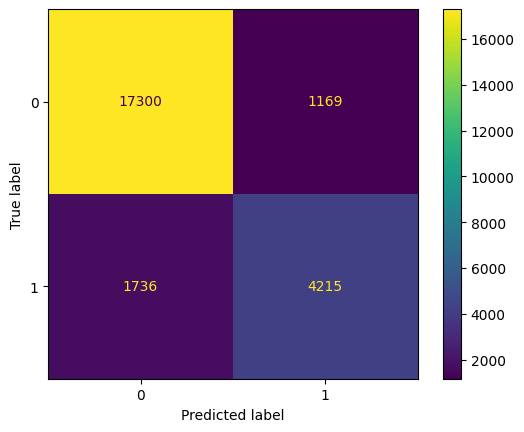

In [ ]:
#plot confusion matrices
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_train, y_train)

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_train, knn_pipe.predict(X_train))

0.7828751857355126

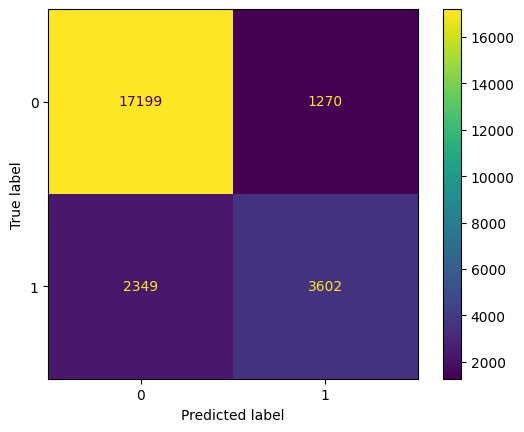

In [ ]:
ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_train, y_train)

In [ ]:
precision_score(y_train, lgr_pipe.predict(X_train))


0.7393267651888341

## Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

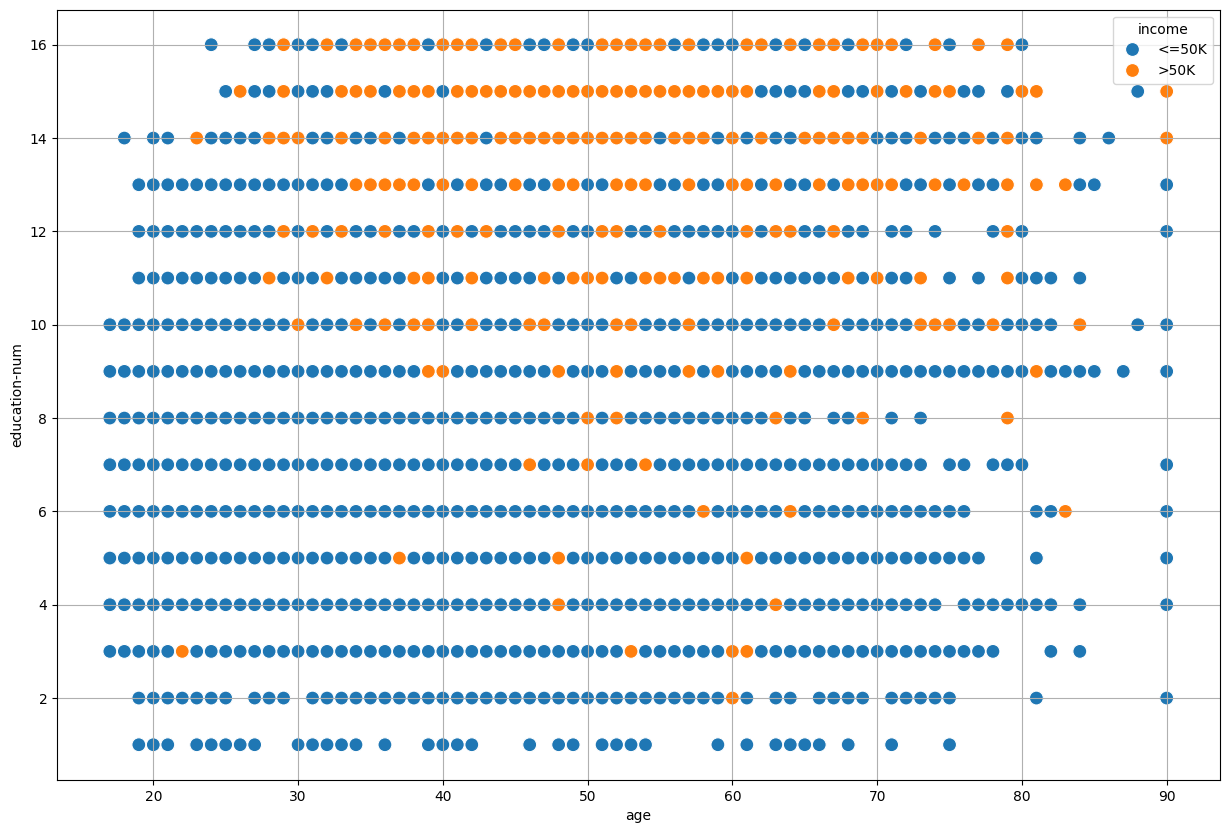

In [ ]:
# Plot individual points of age and education year
plt.figure(figsize = (15, 10))
sns.scatterplot(data = x, x = 'age', y = 'education-num', hue = 'income', s = 100)
plt.grid();

In [ ]:
#Instantiate individual points
tree = DecisionTreeClassifier(max_depth =3, criterion='entropy')

In [ ]:
X = x[['age', 'education-num']]
y = x['income']

In [ ]:
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

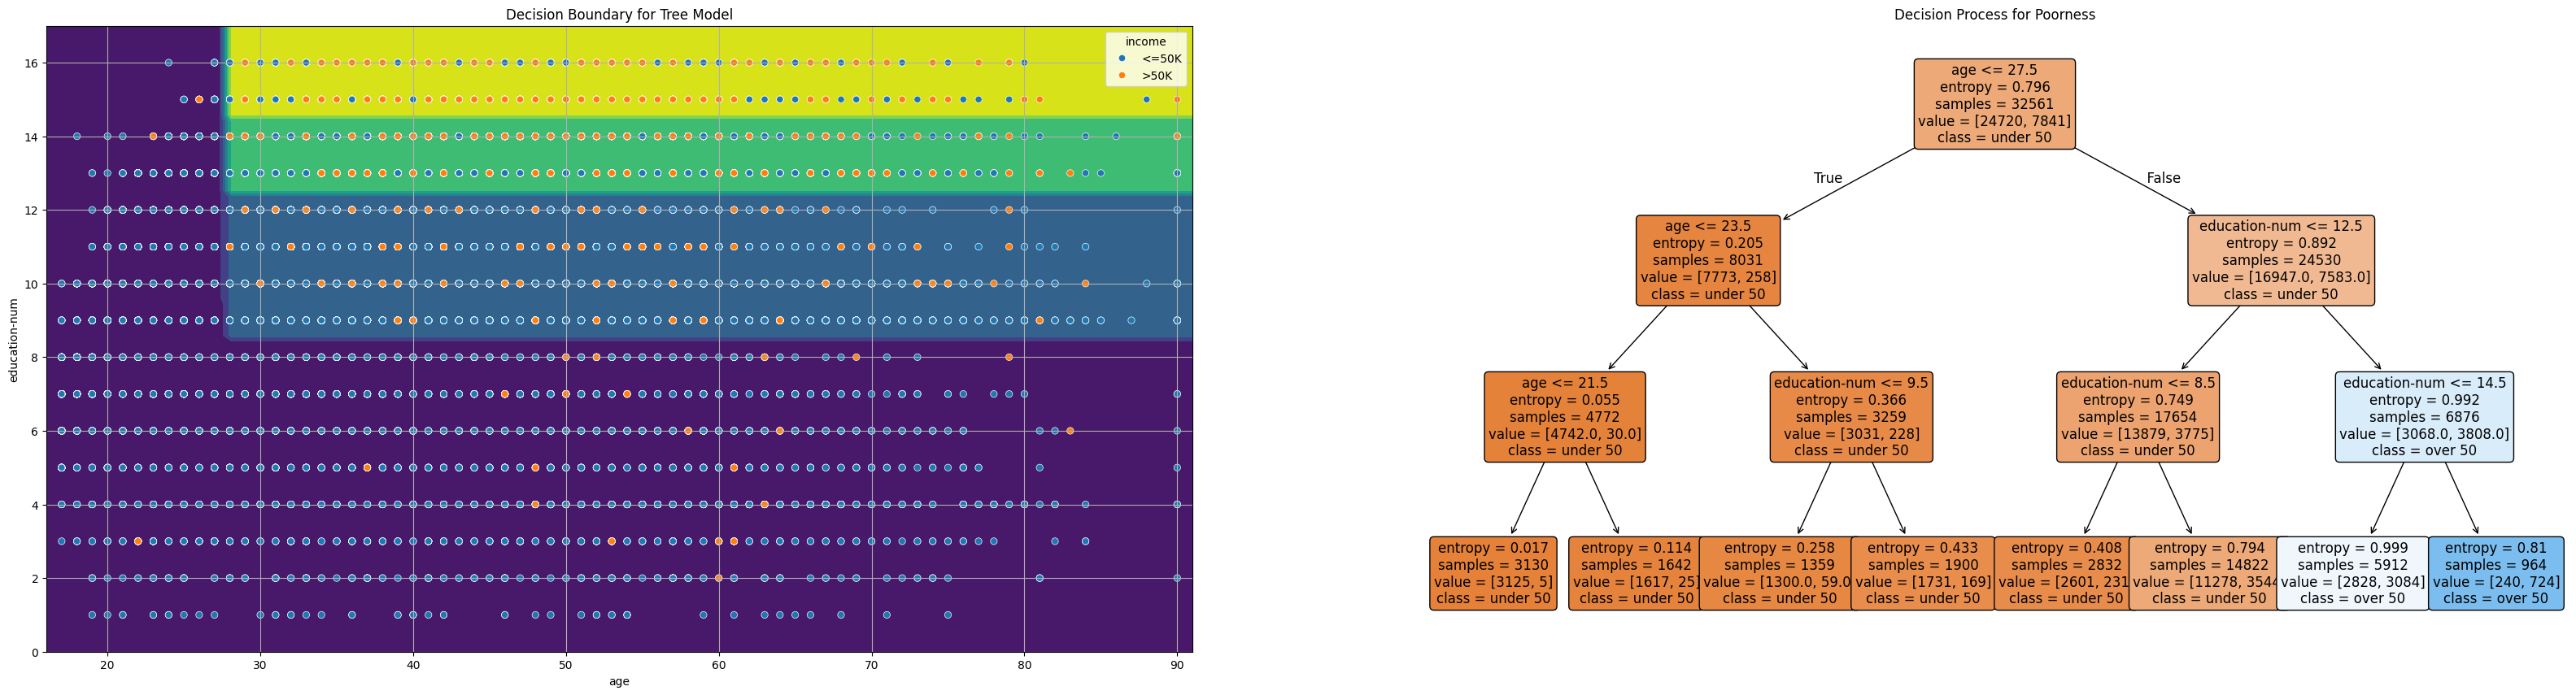

In [ ]:
#Create two graphics of boundaries and the tree individually
fig, ax = plt.subplots(1, 2, figsize = (40, 10))
#create boundary display
DecisionBoundaryDisplay.from_estimator(tree, X, ax = ax[0])
sns.scatterplot(data = X, x = 'age', y = 'education-num', hue = y, ax = ax[0])
ax[0].grid()
ax[0].set_title('Decision Boundary for Tree Model');
plot_tree(tree, feature_names=X.columns,
         filled = True,
         fontsize = 12,
         ax = ax[1],
         rounded = True,
         class_names = ['under 50', 'over 50'])
ax[1].set_title('Decision Process for Poorness');

In [ ]:
tree_score = tree.score(X, y)
tree_score

0.7819170172906238

## Random Forest Model

In [ ]:
#create X & y, split into training and testing data
X = x.drop(['income'], axis=1)
y = x['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
#encode categorical column
cat_cols = X.select_dtypes('object').columns.tolist()
cat_cols
ohe = OneHotEncoder(sparse_output=False, handle_unknown = 'ignore')
transformer = make_column_transformer((ohe, cat_cols), remainder = 'passthrough',
                                     verbose_feature_names_out=False)

In [ ]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', RandomForestClassifier())])

In [ ]:
#define grid of hyperparameters for number of estimators and max depth
param_grid = {'model__n_estimators': [25, 50, 75, 100],'model__max_depth': [3, 4, 5, 6, 10]}

In [ ]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'sex',
                                                                          'native-country'])],
                                                          verbose_feature_names_out=False)),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [25, 50, 75, 100]})

In [ ]:

grid_search.best_params_

{'model__max_depth': 10, 'model__n_estimators': 100}

In [ ]:
grid_search.score(X,y)

0.8638862442799669

In [ ]:
#GRADIENT BOOSTING

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split features and target
X = x.drop('income', axis=1)
y = x['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X)


# Create and train the model
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Fit the model
gb_classifier.fit(X_train, y_train)

# Make predictions
predictions = gb_classifier.predict(X_test)

# Print performance metrics
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      4942
        >50K       0.80      0.62      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.85      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513

